In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

1. Age : displays the age of the individual.
2. Sex : displays the gender of the individual using the following format : 1 = male 0 = female.
3. Chest-pain type : displays the type of chest-pain experienced by the individual using the following format : 1 = typical angina 2 = atypical angina 3 = non - anginal pain 4 = asymptotic
4. Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)
5. Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)
6. Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)
7. Resting ECG : 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy
8. Max heart rate achieved : displays the max heart rate achieved by an individual.
9. Exercise induced angina : 1 = yes 0 = no
10. ST depression induced by exercise relative to rest : displays the value which is integer or float.
11. Peak exercise ST segment : 1 = upsloping 2 = flat 3 = downsloping
12. Number of major vessels (0-3) colored by flourosopy : displays the value as integer or float.
13. Thal : displays the thalassemia : 3 = normal 6 = fixed defect 7 = reversable defect
14. Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not : 0 = absence 1,2,3,4 = present.

In [5]:
df['ca'].unique()

array([0, 2, 1, 3, 4])

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

In [7]:
categorical_cols = ['sex', 'cp','restecg','exang', 'slope','thal']

numerical_cols = list((set(df.columns) - set(categorical_cols)))

In [8]:
numerical_cols.remove('target')

In [9]:
numerical_cols

['thalach', 'trestbps', 'age', 'oldpeak', 'fbs', 'chol', 'ca']

In [10]:
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='mean')), 
        ('scaler',StandardScaler()) 
    ]

)

cat_pipeline=Pipeline(
                steps=[
                ('imputer',SimpleImputer(strategy='most_frequent')), 
                ('onehotencoder',OneHotEncoder())
                ]
            )  


In [11]:
preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)

])

In [12]:
#df = preprocessor.fit_transform(df)

In [13]:
#Splitting the data

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1] 
y = df.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [16]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)

In [17]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8351648351648352
Precision: 0.8571428571428571
Recall: 0.84
F1 Score: 0.8484848484848485


In [19]:
feature_importances = clf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
indices = np.argsort(feature_importances)[::-1]


In [20]:
top_indices = indices[:5]
top_indices

array([ 6,  0,  3, 23, 24])

In [21]:
print("Feature ranking:")
for i in range(len(top_indices)):
    print("%d. %s (%f)" % (i + 1, feature_names[top_indices[i]], feature_importances[top_indices[i]]))

Feature ranking:
1. num_pipeline__ca (0.129558)
2. num_pipeline__thalach (0.098967)
3. num_pipeline__oldpeak (0.083368)
4. cat_pipeline__thal_2 (0.077876)
5. cat_pipeline__thal_3 (0.075060)


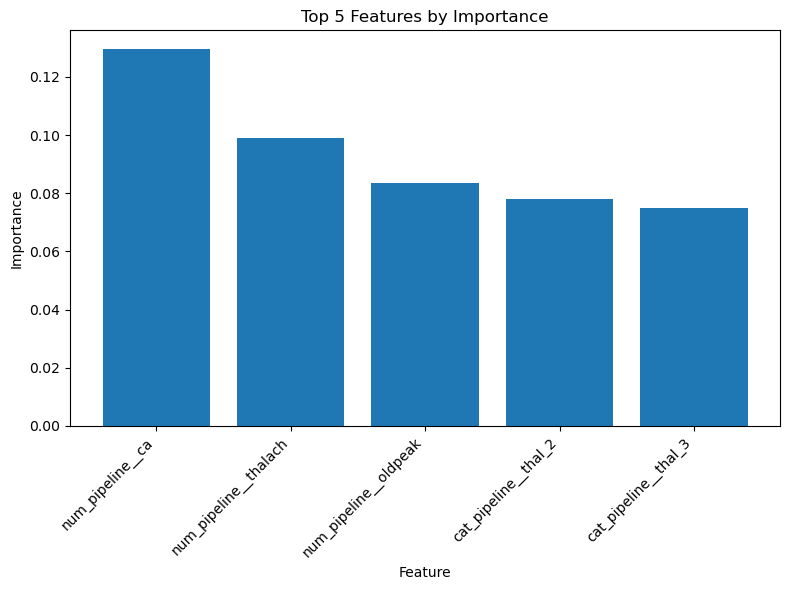

In [22]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(top_indices)), feature_importances[top_indices], align='center')
plt.xticks(range(len(top_indices)), [feature_names[i] for i in top_indices], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 5 Features by Importance')
plt.tight_layout()
plt.show()

ca and thalach are the two most important features

In [23]:
from sklearn.model_selection import GridSearchCV


param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion' : ['gini', 'entropy', 'log_loss']
}

clf = RandomForestClassifier()


grid_search = GridSearchCV(estimator=clf, param_grid=param, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Test set accuracy: 0.8351648351648352


In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8351648351648352
Precision: 0.8431372549019608
Recall: 0.86
F1 Score: 0.8514851485148515


We see that accuracy is almost the same but recall improves and since we are in the medical line where we need to reduce false negatives, having a higher recall is better